Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone2\Dental_Images\rotated_images\rotated_2.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone2\Dental_Images\rotated_images\rotated_3.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone2\Dental_Images\rotated_images\rotated_4.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone2\Dental_Images\rotated_images\rotated_5.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone2\Dental_Images\rotated_images\rotated_7.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone2\Dental_Images\rotated_images\rotated_9.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone2\Dental_Images\rotated_images\rotated_12.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone2\Dental_Images\rotated_images\rotated_13.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone2\Dental_Images\rotated_images\rotated_14.jpg
Error: Failed to load 16.

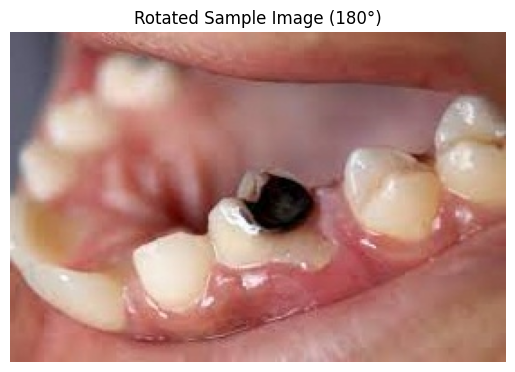

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Define image directory
image_dir = folder_path = os.path.join(os.getcwd(), "../Resources/Dental_Images/Dental_Images/")

# Define list of image filenames
image_filenames = ["2.jpg", "3.jpg", "4.jpg", "5.jpg", "7.jpg", "9.jpg", "12.jpg", "13.jpg", "14.jpg", 
                   "16.jpg", "17.jpg", "18.jpg", "19.jpg", "20.jpg", "22.jpg", "23.jpg", 
                   "24.jpg", "25.jpg", "26.jpg", "27.jpg", "30.jpg"]

# Create a directory to save rotated images
rotated_save_dir = os.path.join(image_dir, "rotated_images")
os.makedirs(rotated_save_dir, exist_ok=True)  # Create folder if it doesn't exist

# Process each image
for filename in image_filenames:
    image_path = os.path.join(image_dir, filename)

    # Load the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Failed to load {filename}")
        continue  # Skip to next image

    # Get image dimensions
    height, width = img.shape[:2]

    # Get the center of the image for rotation
    center_x, center_y = width // 2, height // 2
    center = (center_x, center_y)

    # Define the rotation matrix for 180-degree rotation
    rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)

    # Apply the rotation transformation
    rotated_img = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))

    # Save the rotated image
    rotated_path = os.path.join(rotated_save_dir, f"rotated_{filename}")
    cv2.imwrite(rotated_path, rotated_img)
    
    print(f"Saved rotated image: {rotated_path}")

print("Image rotation complete!")

# Load and display a test rotated image to verify
test_image_path = os.path.join(rotated_save_dir, "rotated_2.jpg")
test_image = cv2.imread(test_image_path)

# Check if test image is loaded
if test_image is not None:
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
    plt.imshow(test_image)
    plt.axis("off")  # Hide axis
    plt.title("Rotated Sample Image (180°)")
    plt.show()
else:
    print("Error: Test image not found for display!")
